In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta
import random

#default colors
colors_ = ('viridis(np.linspace(0, 1, 12))', plt.cm.viridis(np.linspace(0, 1, 7)))[1]


## Data Import
All necessary file links and merged data can be accessed through the TSD.py file. All TSD data frames use the prefix "df_" and can be located using auto complete by entering "TSD.df_".

In [2]:
import TSD

### Initial Look at Data
A quick print out of the merged data reveals the following:

In [3]:
merged_df = TSD.df_merged
merged_df.head()

,dob,gender,city,colonia,state,timein,timeout,clinic_id,patient_id,location,start,end
0,2005-08-09,f,punta colonet,unlisted,BC,2021-05-07 09:44:49.715394,2021-05-07 09:44:49.715421,15,1,Thousand Smiles Ensenada,2021-05-01,2021-05-11
1,2005-08-09,f,punta colonet,unlisted,BC,2021-08-06 09:47:35.775716,2021-08-06 09:47:35.775741,16,1,Thousand Smiles Ensenada,2021-08-01,2021-08-08
2,2005-08-09,f,punta colonet,unlisted,BC,2022-05-06 10:01:49.350689,2022-05-06 10:01:49.350714,23,1,Ensenada,2022-05-06,2022-05-08
3,2005-08-09,f,punta colonet,unlisted,BC,2022-11-04 10:19:36.302828,2022-11-04 10:19:36.302844,25,1,Ensenada,2022-11-04,2022-11-06
4,2005-08-09,f,punta colonet,unlisted,BC,2023-02-03 08:59:22.584125,2023-02-03 08:59:22.584141,30,1,Ensenada,2023-02-03,2023-02-05


### Basic Stats - Population
Some basic charts showing the makeup of the population using Thousand Smiles Clinics in the given time period.

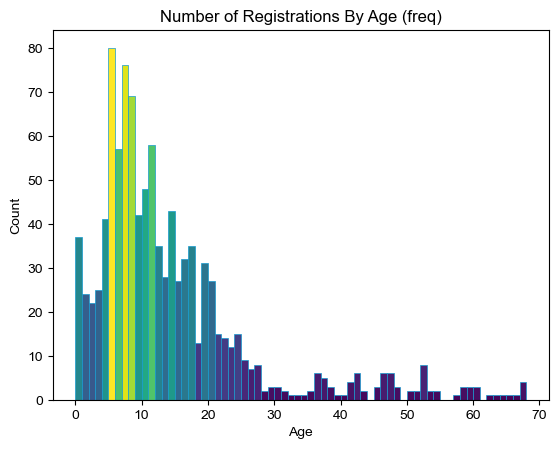

In [6]:
def compute_age(row):
    d1 = row["start"]
    d2 = row["dob"]
    diff_in_years = relativedelta(d1, d2)
    return diff_in_years.years

merged_df["age_in_years"] = merged_df.apply(lambda row: compute_age(row), axis=1)

age_row = merged_df["age_in_years"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data = merged_df, x='age_in_years', facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, bins = int(merged_df["age_in_years"].max()))

axes1.set_title("Number of Registrations By Age (freq)", fontsize=12)
axes1.set_xlabel("Age", fontsize = 10)
axes1.set_ylabel("Count", fontsize = 10)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.show()



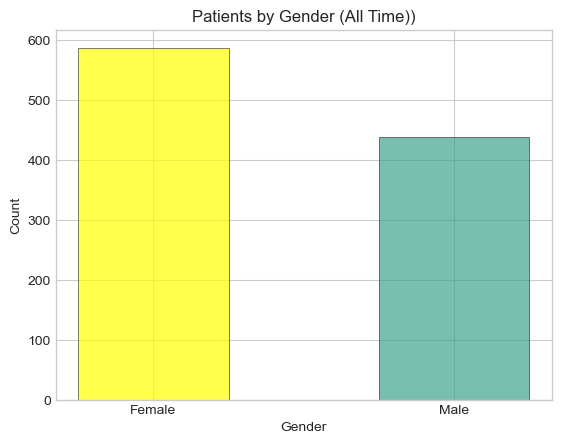

In [7]:
di = {'m': "Male", 'f': "Female"}
merged_df = merged_df.replace({"gender": di})


gender_row = merged_df["gender"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data = merged_df, x='gender', facecolor = '#2ab0ff'
                              , edgecolor='black', linewidth=0.5, bins = 2, align = 'mid', 
                                rwidth= 0.5)

axes1.set_title("Patients by Gender (All Time))", fontsize=12)
axes1.set_xlabel("Gender", fontsize = 10)
axes1.set_ylabel("Count", fontsize = 10)
patches[1].set_facecolor('#40a48e')
patches[0].set_facecolor('yellow')

patches[0].set_alpha(0.7)
patches[1].set_alpha(0.7)

ticks = [0.25,0.75]
ticklabels = ['Female','Male']
plt.xticks(ticks, ticklabels)

plt.show()

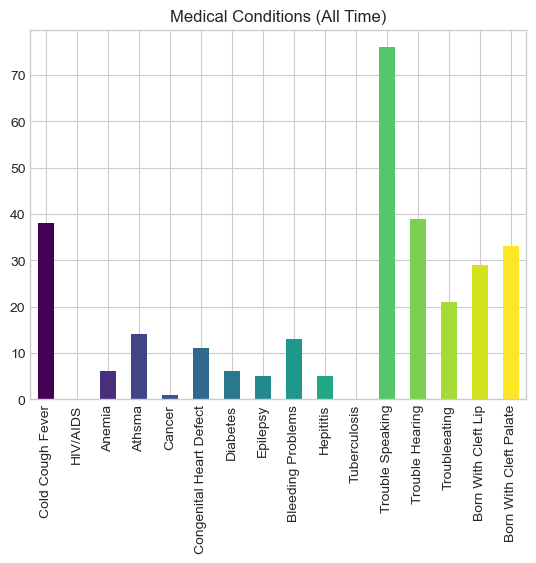

In [8]:
med_srs = TSD.df_medical[["cold_cough_fever", "hivaids", "anemia", "athsma", "cancer", "congenitalheartdefect", "diabetes", "epilepsy", "bleeding_problems", "hepititis", "tuberculosis", "troublespeaking", "troublehearing", "troubleeating", "born_with_cleft_lip", "born_with_cleft_palate"]].sum()
index_ = ["Cold Cough Fever", "HIV/AIDS", "Anemia", "Athsma",
            "Cancer", "Congenital Heart Defect", "Diabetes", "Epilepsy",
            "Bleeding Problems", "Hepititis", "Tuberculosis", "Trouble Speaking",
            "Trouble Hearing", "Troubleeating", "Born With Cleft Lip", 
             "Born With Cleft Palate"]
med_srs.index = index_

colors_2 = ('viridis(np.linspace(0, 1, 12))', plt.cm.viridis(np.linspace(0, 1, len(med_srs))))[1]
med_srs.plot.bar(color=colors_2) 

plt.title("Medical Conditions (All Time)")
    

plt.show()



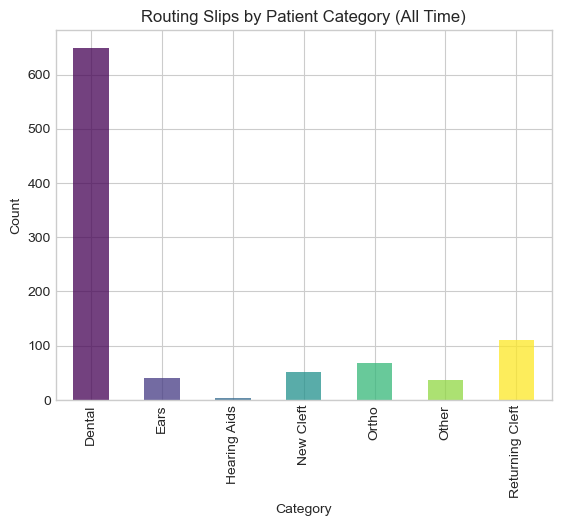

In [9]:
TSD.df_routing['category'].value_counts().sort_index().plot.bar(alpha=0.75, color=colors_)
plt.title("Routing Slips by Patient Category (All Time)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()



In [10]:
merged_df.describe()

,dob,timein,timeout,clinic_id,patient_id,start,end,age_in_years
count,1026,1026,1026,1026.000000,1026.000000,1026,1026,1026.000000
mean,2008-07-06 23:08:04.210526464,2022-11-03 12:54:59.008044544,2022-11-03 12:54:59.008063488,26.820663,479.331384,2022-11-01 21:29:49.473684224,2022-11-04 14:10:31.578947584,13.820663
min,1953-11-08 00:00:00,2021-03-26 08:53:50.027960,2021-03-26 08:53:50.027981,14.000000,1.000000,2021-03-22 00:00:00,2021-03-31 00:00:00,0.000000
25%,2005-03-31 00:00:00,2022-05-29 23:16:31.001306880,2022-05-29 23:16:31.001327872,23.250000,350.000000,2022-05-28 18:00:00,2022-05-30 18:00:00,6.000000
50%,2011-12-22 00:00:00,2022-11-04 13:44:46.396231936,2022-11-04 13:44:46.396247552,27.000000,489.500000,2022-11-04 00:00:00,2022-11-06 00:00:00,10.000000
75%,2016-07-25 12:00:00,2023-05-05 09:19:03.810395136,2023-05-05 09:19:03.810416384,31.000000,640.000000,2023-05-05 00:00:00,2023-05-07 00:00:00,17.000000
max,2023-05-16 00:00:00,2023-08-05 12:06:37.304861,2023-08-05 12:06:37.304877,36.000000,838.000000,2023-08-04 00:00:00,2023-08-06 00:00:00,68.000000
std,NaN,NaN,NaN,5.214520,207.199127,NaN,NaN,12.452799


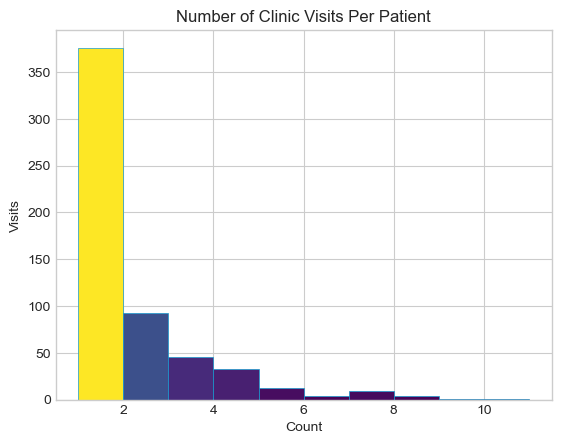

In [11]:
count_df = TSD.df_merged.groupby("patient_id").count();
##count_df["id"].plot(kind='hist', edgecolor='k', alpha=0.75, rot=0)
'''
plt.title("Number of Clinic Visits Per Patient")
plt.xlabel("Count")
plt.ylabel("Visits")
plt.show()
'''
#count_row = count_df["id"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data =count_df, x='dob', align="mid", facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

axes1.set_title("Number of Clinic Visits Per Patient", fontsize=12)
axes1.set_xlabel("Count", fontsize = 10)
axes1.set_ylabel("Visits", fontsize = 10)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.show()

### Basic Stats - Clinics

In [12]:
TSD.df_headshot.head()

,imagetype,path,timestamp,clinic_id,patient_id,station_id
id,,,,,,
583,h,7d58f958-2662-41bf-ba79-ba258f91bd1f,2021-03-26 08:53:49.787763,2021-03-22,342,\N
584,h,25c3c766-b1f7-4497-91cb-e3f8f5639981,2021-03-26 09:22:39.077383,2021-03-22,343,\N
585,h,1fc074ba-baa6-4e32-bc82-f6bafea59be1,2021-03-26 14:30:50.682076,2021-03-22,312,\N
586,h,2f3baa74-1b3e-4799-9eaa-6e291d177d66,2021-03-26 14:36:11.349150,2021-03-22,314,\N
587,h,7876588f-d76b-4295-98c0-50ff8dfb6366,2021-03-27 09:25:17.663296,2021-03-22,344,\N


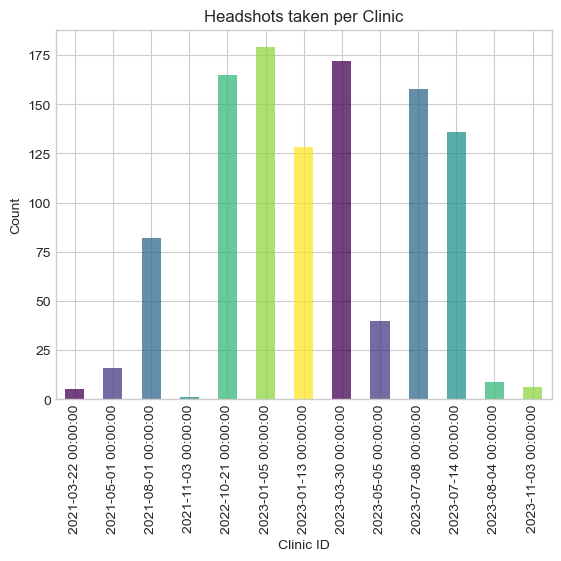

In [13]:
TSD.df_headshot['clinic_id'].value_counts().sort_index().plot(kind='bar', alpha=0.75, color = colors_)
plt.title("Headshots taken per Clinic")
plt.xlabel("Clinic ID")
plt.ylabel("Count")
plt.show()

In [14]:
TSD.df_routing

,id,category,clinic_id,patient_id,createtime,statechangetime
0,1,Dental,NaT,109,2020-02-08 08:49:55.500665,2020-02-08 08:49:55.500689
1,2,Dental,NaT,111,2020-02-08 08:51:40.129857,2020-02-08 08:51:40.129882
2,3,Dental,NaT,12,2020-02-08 08:53:49.794454,2020-02-08 08:53:49.794481
3,4,Dental,NaT,224,2020-02-08 08:57:34.883528,2020-02-08 08:57:34.883565
4,5,Dental,NaT,324,2020-02-08 08:58:11.309246,2020-02-08 08:58:11.309272
...,...,...,...,...,...,...
955,956,Dental,2023-07-08,834,2023-08-05 10:24:36.379231,2023-08-05 10:24:36.379317
956,957,Dental,2023-07-08,835,2023-08-05 10:41:49.502939,2023-08-05 10:41:49.502954
957,958,Dental,2023-07-08,836,2023-08-05 11:11:44.775816,2023-08-05 11:11:44.775830
958,959,Dental,2023-07-08,837,2023-08-05 11:12:15.505873,2023-08-05 11:12:15.505887


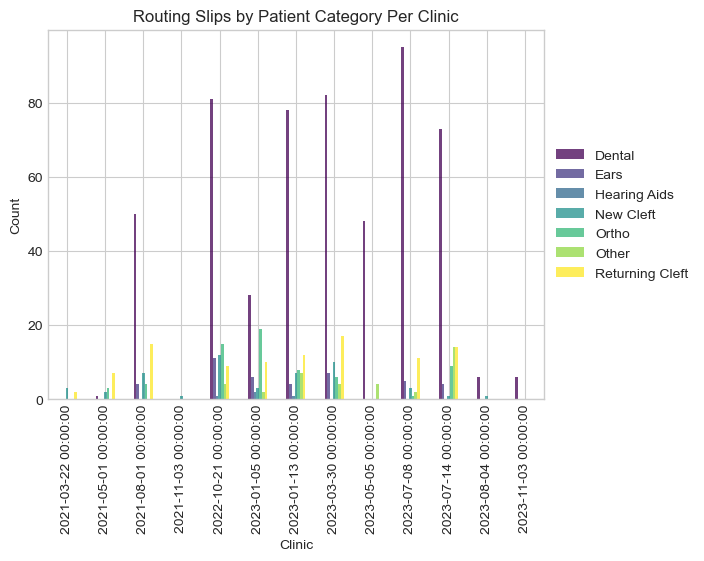

In [15]:
TSD.df_routing.groupby(["clinic_id", "category"]).size().unstack().plot(kind="bar", alpha=0.75, color=colors_).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

plt.title("Routing Slips by Patient Category Per Clinic")
plt.xlabel("Clinic")
plt.ylabel("Count")
plt.show()

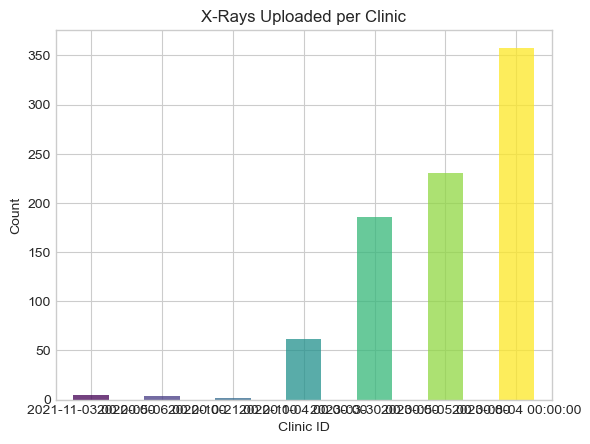

In [16]:
TSD.df_xray['clinic_id'].value_counts().sort_index().plot(kind='bar', alpha=0.75, color=colors_, rot=0)
plt.title("X-Rays Uploaded per Clinic")
plt.xlabel("Clinic ID")
plt.ylabel("Count")
plt.show()

### Information on the Data
The following gives information on the data itself.

In [8]:
TSD.df_register.nunique()

id            1604
timein        1604
timeout       1604
state            1
clinic_id       27
patient_id     838
dtype: int64

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dob         1026 non-null   datetime64[ns]
 1   gender      1026 non-null   object        
 2   city        968 non-null    object        
 3   colonia     1026 non-null   object        
 4   state       1026 non-null   object        
 5   timein      1026 non-null   datetime64[ns]
 6   timeout     1026 non-null   datetime64[ns]
 7   clinic_id   1026 non-null   int64         
 8   patient_id  1026 non-null   int64         
 9   location    1026 non-null   object        
 10  start       1026 non-null   datetime64[ns]
 11  end         1026 non-null   datetime64[ns]
dtypes: datetime64[ns](5), int64(2), object(5)
memory usage: 96.3+ KB


In [ ]:
merged_df.nunique()

#### Potential Problems
Are there any missing values?

In [ ]:
merged_df.isna().sum()

Are there any duplicate values? (id_x represents unique visit)

In [ ]:
merged_df.duplicated().sum()

In [ ]:
TSD.df_merged